<a href="https://colab.research.google.com/github/CST501-IIITKota/lab-repo-BharadwajDinesh/blob/main/Stats_for_DS_Lab_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
d = pd.read_csv("/content/synthetic_dataset_set3.csv")

In [ ]:
d.describe()

,num1,num2,num3
count,198.000000,194.000000,202.000000
mean,53.340061,674.413701,23.135327
std,33.354865,1118.012660,12.969315
min,-50.000000,-800.000000,6.374903
25%,42.001563,268.385504,14.389419
50%,50.879889,531.038948,19.921873
75%,59.600845,801.687660,27.720982
max,300.000000,8000.000000,84.253632


# Part B

In [ ]:
d.head()

,num1,num2,num3,category,priority
0,41.982458,166.642205,11.407725,A,Medium
1,44.021486,689.376952,17.542821,B,Low
2,57.422910,660.564377,15.112147,B,High
3,56.824307,227.921988,47.898145,A,Low
4,200.000000,591.510392,18.608266,A,Low


In [ ]:
d.tail()

,num1,num2,num3,category,priority
205,54.222310,531.038948,49.804139,C,Medium
206,64.091542,886.728885,19.317206,A,Medium
207,51.762173,381.407568,14.389419,A,Medium
208,50.997790,663.334790,20.202114,A,Medium
209,57.767898,837.818862,24.479995,C,Low


In [ ]:
d.shape

(210, 5)

Relevent info on the data are shown below

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   num1      198 non-null    float64
 1   num2      194 non-null    float64
 2   num3      202 non-null    float64
 3   category  200 non-null    object 
 4   priority  204 non-null    object 
dtypes: float64(3), object(2)
memory usage: 8.3+ KB


In [ ]:
d.columns

Index(['num1', 'num2', 'num3', 'category', 'priority'], dtype='object')

In [ ]:
d.dtypes

,0
num1,float64
num2,float64
num3,float64
category,object
priority,object


In [ ]:
d.isna().sum()
# Displays the count of null values in each column

,0
num1,12
num2,16
num3,8
category,10
priority,6


In [ ]:
rows_with_null = d[d.isnull().any(axis=1)]
display(rows_with_null)
# Displays Rows with Null values

,num1,num2,num3,category,priority
5,69.555062,433.032047,17.810274,NaN,Medium
7,55.393798,733.732993,NaN,A,NaN
11,NaN,923.662050,16.318725,B,Low
14,NaN,2000.000000,11.596884,NaN,Low
15,NaN,677.567808,23.460483,C,Low
21,48.934980,NaN,22.681741,B,Low
27,46.386974,NaN,17.914866,A,High
30,NaN,386.332690,27.753285,B,Low
36,58.043522,NaN,19.719201,B,Low
37,51.036159,421.032642,NaN,B,Medium


# Part B
Data Cleaning

## 1. Missing values Handling with 2 methods:
* Removing the null value of categorical value rows
* Replacing the NaN values with the median of the column.

Clean the DataFrame by removing rows with missing values in 'category' or 'priority' columns and then imputing missing numerical values in 'num1', 'num2', and 'num3' with their respective medians. Finally, verify that all missing values have been handled and summarize the cleaning process.

Handle Missing Categorical Values

Remove rows where 'category' or 'priority' columns have missing values.


In [ ]:
d.dropna(subset=['category', 'priority'], inplace=True)
d.head()

,num1,num2,num3,category,priority
0,41.982458,166.642205,11.407725,A,Medium
1,44.021486,689.376952,17.542821,B,Low
2,57.422910,660.564377,15.112147,B,High
3,56.824307,227.921988,47.898145,A,Low
4,200.000000,591.510392,18.608266,A,Low


In [ ]:
d.isna().sum()

,0
num1,11
num2,12
num3,6
category,0
priority,0



To impute the missing numerical values, calculate the median for each of the 'num1', 'num2', and 'num3' columns. Then, I will use the `fillna()` method to replace the NaN values in these columns with their calculated medians.



Impute Missing Numerical Values

Fill missing values in numerical columns ('num1', 'num2', 'num3') with the median of their respective columns.


In [ ]:
numerical_cols = ['num1', 'num2', 'num3']
for col in numerical_cols:
  median_val = d[col].median()
  d[col] = d[col].fillna(median_val)
  print(f"Median for {col}: {median_val}")

Median for num1: 50.899156232948194
Median for num2: 531.0389484319594
Median for num3: 20.20211402340654


In [ ]:
d.isna().sum()

,0
num1,0
num2,0
num3,0
category,0
priority,0


**Reasoning**:
With all missing values handled, the next step is to summarize the cleaning process by displaying the first few rows of the cleaned DataFrame to observe the changes and then show the DataFrame's information to confirm data types and non-null counts.



In [ ]:
display(d.head())
d.info()

,num1,num2,num3,category,priority
0,41.982458,166.642205,11.407725,A,Medium
1,44.021486,689.376952,17.542821,B,Low
2,57.422910,660.564377,15.112147,B,High
3,56.824307,227.921988,47.898145,A,Low
4,200.000000,591.510392,18.608266,A,Low


<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 209
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   num1      194 non-null    float64
 1   num2      194 non-null    float64
 2   num3      194 non-null    float64
 3   category  194 non-null    object 
 4   priority  194 non-null    object 
dtypes: float64(3), object(2)
memory usage: 9.1+ KB


In [ ]:
d.tail()

,num1,num2,num3,category,priority
205,54.222310,531.038948,49.804139,C,Medium
206,64.091542,886.728885,19.317206,A,Medium
207,51.762173,381.407568,14.389419,A,Medium
208,50.997790,663.334790,20.202114,A,Medium
209,57.767898,837.818862,24.479995,C,Low


## Outlier detection: Using IQR

/tmp/ipython-input-1498700165.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([d['num1'], d['num2'], d['num3']], labels=['d1', 'd2', 'd3'])


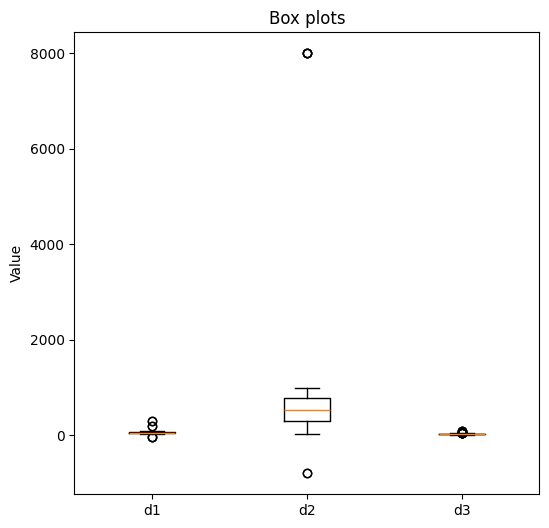

In [ ]:
plt.figure(figsize=(6, 6))
plt.boxplot([d['num1'], d['num2'], d['num3']], labels=['d1', 'd2', 'd3'])
plt.title('Box plots')
plt.ylabel('Value')
plt.show()


In [ ]:
Q1 = d['num1'].quantile(0.25)
Q3 = d['num1'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_num1 = d[(d['num1'] < lower_bound) | (d['num1'] > upper_bound)]

print(f"Outliers in 'num1' (using IQR):")
display(outliers_num1)

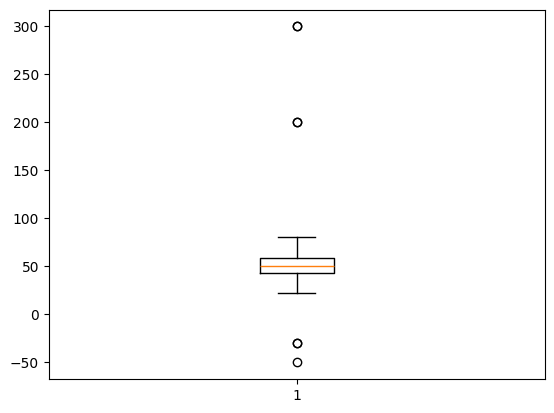

In [ ]:
plt.boxplot(d['num1'])
plt.show()

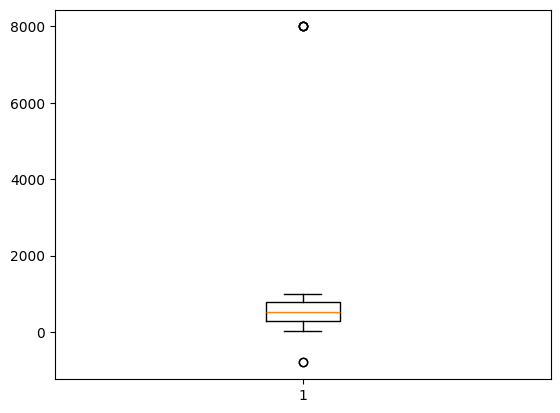

In [ ]:
plt.boxplot(d['num2'])
plt.show()

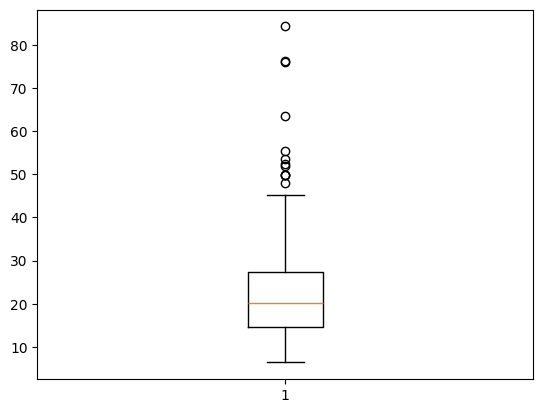

In [ ]:
plt.boxplot(d['num3'])
plt.show()

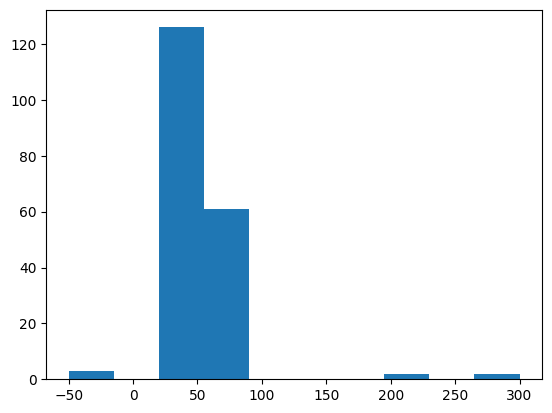

In [ ]:
plt.hist(d['num1'], bins=10)
plt.show()

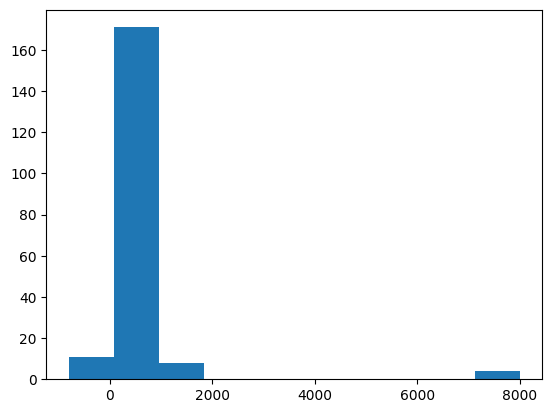

In [ ]:
plt.hist(d['num2'], bins=10)
plt.show()

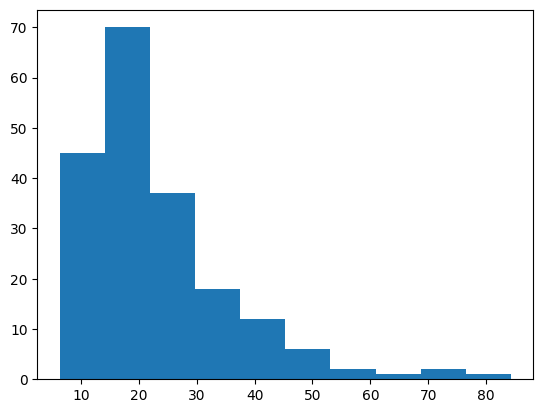

In [ ]:
plt.hist(d['num3'], bins=10)
plt.show()

array([[<Axes: title={'center': 'num1'}>,
        <Axes: title={'center': 'num2'}>],
       [<Axes: title={'center': 'num3'}>, <Axes: >]], dtype=object)

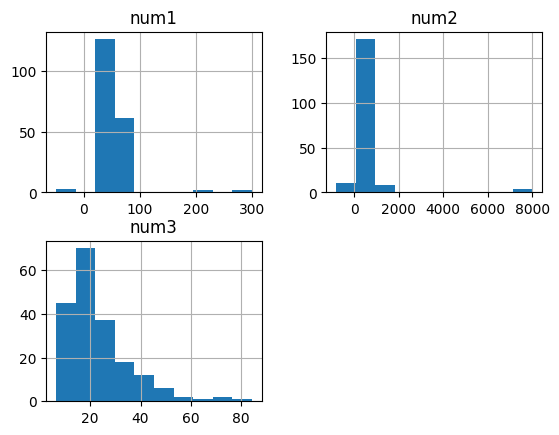

In [ ]:
d.hist()

In [ ]:
Q1 = d["num1"].quantile(0.25)
Q3 = d["num1"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = d[(d["num1"] < lower_bound) | (d["num1"] > upper_bound)]

In [ ]:
outliers

,num1,num2,num3,category,priority
4,200.0,591.510392,18.608266,A,Low
12,300.0,817.866835,12.936721,C,Medium
56,300.0,751.256514,26.510480,A,Low
57,-30.0,640.321582,18.035349,C,Medium
69,200.0,248.606238,19.514163,B,Medium
159,-30.0,858.255992,25.009592,A,Medium
167,-50.0,77.637338,40.093577,A,Medium


In [ ]:
data = d.drop(outliers.index)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 209
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   num1      187 non-null    float64
 1   num2      187 non-null    float64
 2   num3      187 non-null    float64
 3   category  187 non-null    object 
 4   priority  187 non-null    object 
dtypes: float64(3), object(2)
memory usage: 8.8+ KB


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 209
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   num1      194 non-null    float64
 1   num2      194 non-null    float64
 2   num3      194 non-null    float64
 3   category  194 non-null    object 
 4   priority  194 non-null    object 
dtypes: float64(3), object(2)
memory usage: 13.2+ KB


In [ ]:
Q1 = d["num2"].quantile(0.25)
Q3 = d["num2"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers2 = d[(d["num2"] < lower_bound) | (d["num2"] > upper_bound)]
outliers2

,num1,num2,num3,category,priority
44,49.859055,8000.0,9.612721,A,High
59,70.713625,-800.0,21.665406,B,Low
62,46.781985,8000.0,51.988570,C,Low
82,50.860623,8000.0,20.769540,A,High
83,47.036280,-800.0,20.202114,B,Medium
112,75.719024,8000.0,21.393396,B,High


In [ ]:
data = d.drop(outliers2.index)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 0 to 209
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   num1      188 non-null    float64
 1   num2      188 non-null    float64
 2   num3      188 non-null    float64
 3   category  188 non-null    object 
 4   priority  188 non-null    object 
dtypes: float64(3), object(2)
memory usage: 8.8+ KB


In [ ]:
Q1 = d["num3"].quantile(0.25)
Q3 = d["num3"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers3 = d[(d["num3"] < lower_bound) | (d["num3"] > upper_bound)]
outliers3

,num1,num2,num3,category,priority
3,56.824307,227.921988,47.898145,A,Low
58,33.232851,346.225921,55.315921,B,Medium
62,46.781985,8000.000000,51.988570,C,Low
73,60.247259,908.231363,49.906296,B,Low
74,60.517437,785.191162,53.531004,B,Medium
94,51.548797,458.626902,76.107318,A,Low
98,77.416061,982.548202,63.547611,B,Medium
118,57.767456,803.009607,84.253632,A,High
143,54.222310,531.038948,49.804139,C,Medium
153,60.242882,403.180157,52.318974,A,High


In [ ]:
data = d.drop(outliers3.index)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0 to 209
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   num1      182 non-null    float64
 1   num2      182 non-null    float64
 2   num3      182 non-null    float64
 3   category  182 non-null    object 
 4   priority  182 non-null    object 
dtypes: float64(3), object(2)
memory usage: 8.5+ KB


In [ ]:
data.index

Index([  0,   1,   2,   4,   6,   8,   9,  10,  11,  12,
       ...
       199, 200, 201, 202, 203, 204, 206, 207, 208, 209],
      dtype='int64', length=182)

In [ ]:
combined_outlier_indices = pd.Index([])
combined_outlier_indices = combined_outlier_indices.union(outliers.index)
combined_outlier_indices = combined_outlier_indices.union(outliers2.index)
combined_outlier_indices = combined_outlier_indices.union(outliers3.index)

d_cleaned = d.drop(combined_outlier_indices)

print(f"Original DataFrame shape: {d.shape}")
print(f"Number of unique outlier rows removed: {len(combined_outlier_indices)}")
print(f"Cleaned DataFrame shape: {d_cleaned.shape}")

display(d_cleaned.head())
d_cleaned.info()

Original DataFrame shape: (194, 5)
Number of unique outlier rows removed: 17
Cleaned DataFrame shape: (177, 5)


,num1,num2,num3,category,priority
0,41.982458,166.642205,11.407725,A,Medium
1,44.021486,689.376952,17.542821,B,Low
2,57.422910,660.564377,15.112147,B,High
4,200.000000,591.510392,18.608266,A,Low
6,53.623595,267.724558,19.462080,C,Medium


<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 0 to 209
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   num1      177 non-null    float64
 1   num2      177 non-null    float64
 2   num3      177 non-null    float64
 3   category  177 non-null    object 
 4   priority  177 non-null    object 
dtypes: float64(3), object(2)
memory usage: 8.3+ KB


/tmp/ipython-input-1659878278.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([d_cleaned['num1'], d_cleaned['num2'], d_cleaned['num3']], labels=['num1', 'num2', 'num3'])


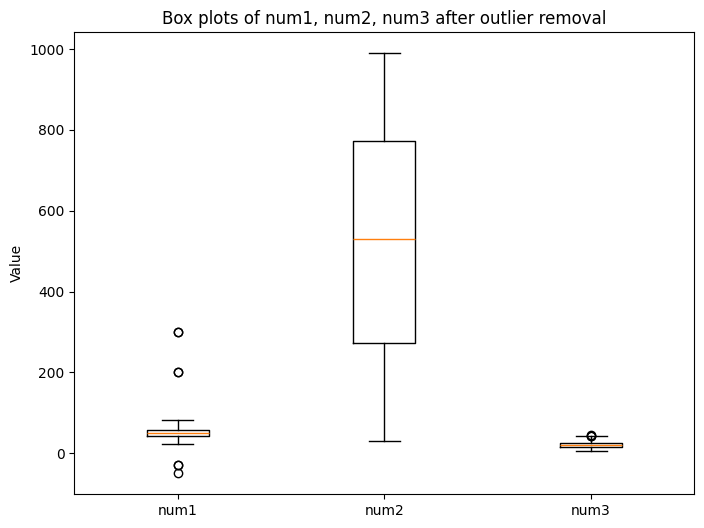

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot([d_cleaned['num1'], d_cleaned['num2'], d_cleaned['num3']], labels=['num1', 'num2', 'num3'])
plt.title('Box plots of num1, num2, num3 after outlier removal')
plt.ylabel('Value')
plt.show()

# Part D

### `loc` - Label-based indexing

In [ ]:
print("Original d_cleaned DataFrame head:")
display(d_cleaned.head())

display(d_cleaned.loc[2])

print("\n'num1' and 'category' columns for all rows using loc:")
display(d_cleaned.loc[:, ['num1', 'category']].head())

# 3. Select rows by a range of index labels (inclusive) and specific columns
print("\nRows with original index labels from 0 to 6 (inclusive) and 'num1', 'num3' columns using loc:")
display(d_cleaned.loc[0:6, ['num1', 'num3']])

display(d_cleaned.loc[0])

Original d_cleaned DataFrame head:


,num1,num2,num3,category,priority
0,100.000000,500.000000,11.407725,A,Medium
1,44.021486,689.376952,17.542821,B,Low
2,57.422910,660.564377,15.112147,B,High
4,200.000000,591.510392,18.608266,A,Low
6,53.623595,267.724558,19.462080,C,Medium


,2
num1,57.42291
num2,660.564377
num3,15.112147
category,B
priority,High



'num1' and 'category' columns for all rows using loc:


,num1,category
0,100.000000,A
1,44.021486,B
2,57.422910,B
4,200.000000,A
6,53.623595,C



Rows with original index labels from 0 to 6 (inclusive) and 'num1', 'num3' columns using loc:


,num1,num3
0,100.000000,11.407725
1,44.021486,17.542821
2,57.422910,15.112147
4,200.000000,18.608266
6,53.623595,19.462080


,0
num1,100.0
num2,500.0
num3,11.407725
category,A
priority,Medium


### iloc - Integer-location based indexing

In [ ]:
# 1. Select the first row by integer position
display(d_cleaned.iloc[0])

# 2. Select the first three rows by integer position (exclusive end)
print("\nFirst three rows (positions 0, 1, 2) using iloc:")
display(d_cleaned.iloc[0:3])

,0
num1,100.0
num2,500.0
num3,11.407725
category,A
priority,Medium



First three rows (positions 0, 1, 2) using iloc:


,num1,num2,num3,category,priority
0,100.000000,500.000000,11.407725,A,Medium
1,44.021486,689.376952,17.542821,B,Low
2,57.422910,660.564377,15.112147,B,High


### Removing Duplicate Values

In [ ]:
print(f"Shape of DataFrame before removing duplicates: {d_cleaned.shape}")

d_cleaned_no_duplicates = d_cleaned.drop_duplicates()

print(f"Shape of DataFrame after removing duplicates: {d_cleaned_no_duplicates.shape}")
display(d_cleaned_no_duplicates.head())

Shape of DataFrame before removing duplicates: (177, 5)
Shape of DataFrame after removing duplicates: (168, 5)


,num1,num2,num3,category,priority
0,100.000000,500.000000,11.407725,A,Medium
1,44.021486,689.376952,17.542821,B,Low
2,57.422910,660.564377,15.112147,B,High
4,200.000000,591.510392,18.608266,A,Low
6,53.623595,267.724558,19.462080,C,Medium
